In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json, time, os, zipfile

**Dado em Análise:** 

https://www.kaggle.com/competitions/instacart-market-basket-analysis/data

In [2]:
if not os.path.isdir('./data'):
    os.mkdir('./data')

if os.path.isfile('./data/order_products.zip'):
    with zipfile.ZipFile('./data/order_products.zip', 'r') as zip_ref:
        zip_ref.extractall('./data')

In [3]:
orders = {}
if not os.path.isfile('./data/orders.json'):
    with open('./data/order_products.csv', 'r') as file:
        next(file)
        for line in file:
            order_id, product_id, _, _ = line.strip().split(',')

            if order_id not in orders.keys():
                orders[order_id] = [product_id]
            else:
                orders[order_id].append(product_id)
    json.dump(orders, open('./data/orders.json', 'w'))
else:
    orders = json.load(open('./data/orders.json', 'r'))
orders = orders.values()

In [4]:
n_products = [ len(order) for order in orders ]
pd.Series(n_products).describe().round(2)

count    3214874.00
mean          10.09
std            7.53
min            1.00
25%            5.00
50%            8.00
75%           14.00
max          145.00
dtype: float64

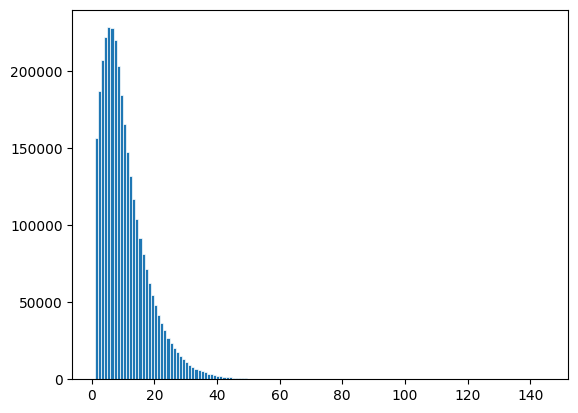

In [5]:
plt.hist(n_products, bins=np.max(n_products), edgecolor='white', linewidth=0.5)
plt.show()

In [6]:
# filtred_orders = [order for order in orders if len(order) > 3 and len(order) <= 40]
# n__filtred_products = [ len(order) for order in filtred_orders ]
# pd.Series(n__filtred_products).describe().round(2)

In [7]:
# plt.hist(n__filtred_products, bins=np.max(n__filtred_products), edgecolor='white', linewidth=0.5)
# plt.show()

In [8]:
def gen_edges_data(orders, filename):
    edges = {}
    if not os.path.isfile(f'./data/{filename}.json'):
        t = time.time()
        print('Gerando dados...')
        for i, order in enumerate(orders):
            for productA in order:
                for productB in order:
                    if productA != productB: 
                        A, B = sorted([productA, productB])
                        edge = f'{A},{B}'
                        edges[edge] = edges.get(edge, 0)+1
            
            if time.time()-t > 10:
                t = time.time()
                print(f'{i/len(orders)*100:.4f}%')
        print('Ordenando...')
        edges = dict(sorted(edges.items(), key=lambda x: x[1], reverse=True))
        print('Salvando...')
        json.dump(edges, open(f'./data/{filename}.json', 'w'), indent=2)
    else:
        edges = json.load(open(f'./data/{filename}.json', 'r'))
    return edges

edges = gen_edges_data(orders, 'edges')


Gerando dados...
4.0755%
7.3235%
10.7344%
13.8632%
17.3867%
20.5722%
24.2561%
27.9524%
31.4987%
34.9960%
38.0766%
41.7201%
45.2949%
48.8510%
52.4966%
56.2040%
59.8805%
63.5912%
67.2138%
70.8421%
74.4885%
78.0808%
81.6504%
85.2637%
88.8321%
92.4260%
95.9928%
99.5608%
Ordenando...
Salvando...


In [9]:
pd.Series(edges.values()).describe().round(2)

count    40749010.00
mean           11.70
std           133.96
min             2.00
25%             2.00
50%             2.00
75%             6.00
max        124682.00
dtype: float64

In [11]:
threshold = 1000

with open('./data/edges.csv', 'w') as file:
    for edge, value in edges.items():
        if value > threshold:
            file.write(f'{edge},{value}\n')